<h1>Coffee (Worldwide) - Data Visualisation</h1>
<img src='coffee-2714970_640.jpg'></img>

<h2>List of content:</h2>
<ol>
    <li>Used Libraries</li>
    <li>Functions</li>
    <li>Connecting to database</li>
    <li>Loading data</li>
    <li>Creating tables</li>
    <li>Analasys:</li>
    <ul>
        <li>Analysis Goals</li>
        <li>Analising data:</li>
        <ul>
            <li>Domestic Consumption</li>
            <li>Imports</li>
            <li>Retail Prices</li>
            <li>Total Production</li>
        </ul>
    </ul>
 </ol>

<h3>1. Used Libraries</h3>

In [2]:
import csv
import sqlite3 as sql
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<h3>2. Functions</h3>

In [3]:
#   1) Table Creator
#   Description: Create table based on given name, .csv file, 
#                CREATE (query1) and INSERT (query2) queries.
#   NOTE
#   If database exist, code won't be executed and will return OperationalError.
#   To make it work, delete file called "coffee.db" from folder.

def createTable(file, tableName, queryCreate, queryInsert):
    
    variablesTemp = []  #   Creating list of variables used in query1
                        #   which will contain table name and column names

    variablesTemp.append(tableName)

    with open(file) as f:
        readf = csv.reader(f, delimiter= ';')
        header = next(readf)   #    list of column names 
        [variablesTemp.append(col) for col in header]
        cur.execute(queryCreate % tuple(variablesTemp))  #   Executing query
        rows = [row for row in readf]

        #   Inserting data into table
        for row in rows:
            variablesTemp = []  #   Creating list of variables used in query2
                                #   which will contain table name and data
            variablesTemp.append(tableName)
            [variablesTemp.append(col) for col in row]

            #   Replacing apsotrophe (') to backtiks (`), becouse apostrophe
            #   in variable breaks query

            variablesTemp = [variable.replace("'","`") 
                             for variable in variablesTemp]
            
            cur.execute(queryInsert % tuple(variablesTemp))  #  Executing query
            con.commit()

In [4]:
#   2) Querry To List
#   Description: Creates nested list based on provided table name,
#                SELECT query, list of columns (used in query) 
#                filter (for WHERE condition used in query).

def querryList(tableName, # name of table 
               query, #    string variable which contains SELECTION querry
               columns = '',    #    list of columns used in querry
               filter = '' #   used for WHERE condition in querry
                ):
    
    variables = []
    #   Adding comprehensive list of column names to variables used in querry
    if columns: #   Adding not empty list of column
        variables = [column for column in columns]

    #   Adding table name to the list of variables
    variables.append(tableName)
    
    if filter:  #   Adding not empty filter
        variables.append(filter)

    #   Executing querry with variables given in function
    res = cur.execute(query% tuple(variables))
    
    #  Writing query to list 
    listData = res.fetchall()

    #   Return nested list
    return listData

<h3>3. Connecting to database</h3>

In [5]:
con = sql.connect("coffee.db")
cur = con.cursor() #    Creating cursor which will be resposible for
                   #    executing cursors

<h3>4. Loading data</h3>

In [6]:
#   Creating dictionary with file names (in .csv format) and table names 
#   assigned to those files.
files = { 
    "retail-prices.csv": "prices",
    "imports.csv": "imports",
    "total-production.csv": "production"
        }
#   format: {file_name: table_name}

<h4>Data description</h4>
<p>Used files:</p>
<ul>
  <li><b>retail-prices.csv</b> - Retail prices of roasted coffee in
    selected importing countries</li>
  <li><b>imports.csv</b> - Imports by selected importing countries</li>
  <li><b>total-production.csv</b> - Total production by all exporting</br>
    countries</li>
</ul>
<b style = 'color:cyan'>Note</b>
<p>Files have been modified with use of Microsoft Excel for the purpose of<br>
data visualization</p>
Original dataset: 
<a href=
"https://www.kaggle.com/datasets/yamaerenay/ico-coffee-dataset-worldwide">
  Link
</a>

<h3>5. Creating tables from given files</h3>

In [7]:
queryCreate = "CREATE TABLE %s (%s VARCHAR, %s VARCHAR, %s FLOAT)"
queryInsert = "INSERT INTO %s VALUES('%s', '%s', '%s')"

for file, tableName in files.items():
    createTable(file, tableName, queryCreate, queryInsert)

OperationalError: table prices already exists

<h3>6. Analasys</h3>

<h4>&ensp;Analysis Goals</h4>
<ol>
    <li>Total summary</li>
    <li>Summary of average values over the years</li>
    <li>Summary of chosen country</li>
    <li>Summary of chosen year</li>
</ol>

<p>Used mesurments:</p>
<ul>
    <li>number of records(count),</li> 
    <li>mean value(mean),</li>
    <li> <a href="https://en.wikipedia.org/wiki/Standard_deviation">
    standard deviation(std),</a></li>
    <li>minimum(min) and maximum(max) value,</li>
    <li> <a href="https://en.wikipedia.org/wiki/Quartile">
    first(25%), second(50%) and third(75%) quartile</a></li>
</ul>

<p>Used graphs:</p>
<ul>
    <li>Linear</li>
    <li>Column (Horizontal)</li>
</ul>


<h4>&ensp;Analysing data</h4>

In [8]:
#   Used queries
queryINF = "PRAGMA table_info(%s)"  #   table information
queryAll = "SELECT * FROM %s"   #   all data from table
queryAVG = "SELECT %s, AVG(%s) FROM %s GROUP BY 1"
queryWhereCountry = "SELECT * FROM %s WHERE Country = '%s'"
queryWhereYear = "SELECT * FROM %s WHERE Year = '%s'"

<h5>&emsp;<b>Retail Prices</b></h5>

<p>&emsp;1. Total summary</p>

In [9]:
#   Creating dataframe and summary
table = 'prices'

    #   Getting column names from table
data = querryList(table, queryINF)
header = [col[1] for col in data]

    #   Getting table data
data = querryList(table, queryAll)

    #   Data Frame
dataframe = pd.DataFrame(data, columns=header)
dataframe = dataframe.replace('-', np.nan)   #   Converting empty string to  
                                            #   Not a Number
dataframe = dataframe.dropna() # removing records with NaN values
pd.set_option("display.max_rows", None)
display(dataframe)
    #   Summary 

maxRow = dataframe.loc[dataframe['Value'] == max(dataframe['Value']), 
                        ['Country', 'Year']]
maxRow = maxRow.iloc[0]

minRow = dataframe.loc[dataframe['Value'] == min(dataframe['Value']), 
                        ['Country', 'Year']]
minRow = minRow.iloc[0]

print("SUMMARY")
print("Country with highest value: %s in year: %s"% 
      (maxRow.iloc[0], maxRow.iloc[1]))
print("Country with lowest value: %s in year: %s"% 
      (minRow.iloc[0], minRow.iloc[1]))

,Country,Year,Value
0,Austria,1990,10.816777
1,Austria,1991,10.088300
2,Austria,1992,11.015453
3,Austria,1993,10.971302
4,Austria,1994,10.110375
5,Austria,1995,11.434879
6,Austria,1996,11.964680
7,Austria,1997,9.646799
8,Austria,1998,8.763797
9,Austria,1999,7.240618


SUMMARY
Country with highest value: United Kingdom in year: 2014
Country with lowest value: Finland in year: 2002


<p>&emsp;2. Summary of average values over the years</p>

In [10]:
#   Creating Dataframe and summary
cols = ['Year', 'Value']
data = querryList(table, queryAVG, cols)

dataframe = pd.DataFrame(data, columns = ['Year', 'Average Value'])
display(dataframe)
dataframe.describe()

maxAVG = dataframe.loc[dataframe['Average Value'] == 
                       max(dataframe['Average Value']), 'Year']
maxAVG = maxAVG.iloc[0]

minAVG = dataframe.loc[dataframe['Average Value'] == 
                       min(dataframe['Average Value']), 'Year']
minAVG = minAVG.iloc[0]

print("SUMMARY")
print("Year with highest average value: %s"% maxAVG)
print("Year with lowest average value: %s"% minAVG)

,Year,Average Value
0,1990,10.386313
1,1991,10.424156
2,1992,10.532955
3,1993,9.651529
4,1994,10.994954
5,1995,14.035005
6,1996,12.798802
7,1997,12.451908
8,1998,12.407758
9,1999,11.483759


SUMMARY
Year with highest average value: 2014
Year with lowest average value: 2001


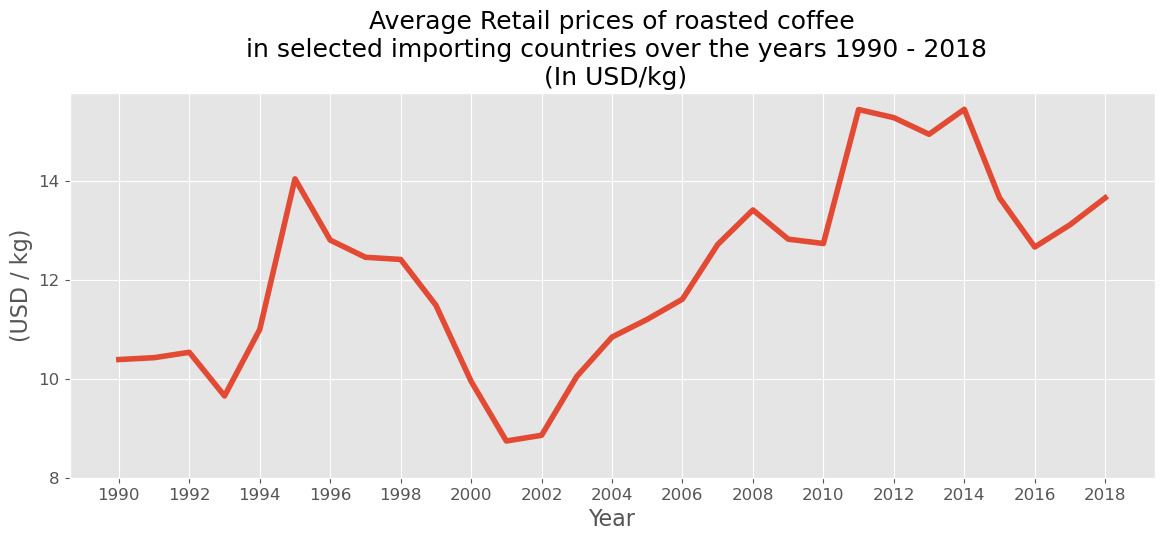

In [11]:
#   Creating graph
yearsPrice = list(dataframe["Year"])
avgPrice = list(dataframe["Average Value"])

plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.plot(yearsPrice, avgPrice, linewidth = 4)

plt.title('Average Retail prices of roasted coffee'
            '\n in selected importing countries over the years 1990 - 2018' 
            '\n (In USD/kg)', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('(USD / kg)', fontsize = 16)

plt.xticks([i for i in range(0, 29, 2)], fontsize = 12)
plt.yticks([j for j in range(8, 16, 2)], fontsize = 12)

plt.show()

<p>&emsp;3. Summary of chosen country</p>

In [12]:
#   Creating Dataframe and summary
country = input("Insert country name: ")
#country = "Norway" #    Static value
data = querryList(table, queryWhereCountry, filter = country)

dataframe = pd.DataFrame(data, columns = header)
dataframe = dataframe.replace('-', np.nan)   #   Converting empty string to  
                                            #   Not a Number
dataframe = dataframe.dropna() # removing records with NaN values
dataframe = dataframe.drop(columns = 'Country')
print("Chosen country: %s"% country.upper())
display(dataframe)

maxYear = dataframe.loc[dataframe['Value'] == max(dataframe['Value']), 'Year']
maxYear = maxYear.iloc[0]

minYear = dataframe.loc[dataframe['Value'] == min(dataframe['Value']), 'Year']
minYear = minYear.iloc[0]

print("SUMMARY")
print("Year with highest value: %s"% maxYear)
print("Year with lowest value: %s"% minYear)

Insert country name: Austria
Chosen country: AUSTRIA


,Year,Value
0,1990,10.816777
1,1991,10.088300
2,1992,11.015453
3,1993,10.971302
4,1994,10.110375
5,1995,11.434879
6,1996,11.964680
7,1997,9.646799
8,1998,8.763797
9,1999,7.240618


SUMMARY
Year with highest value: 2014
Year with lowest value: 2002


NameError: name 'DataGrid' is not defined

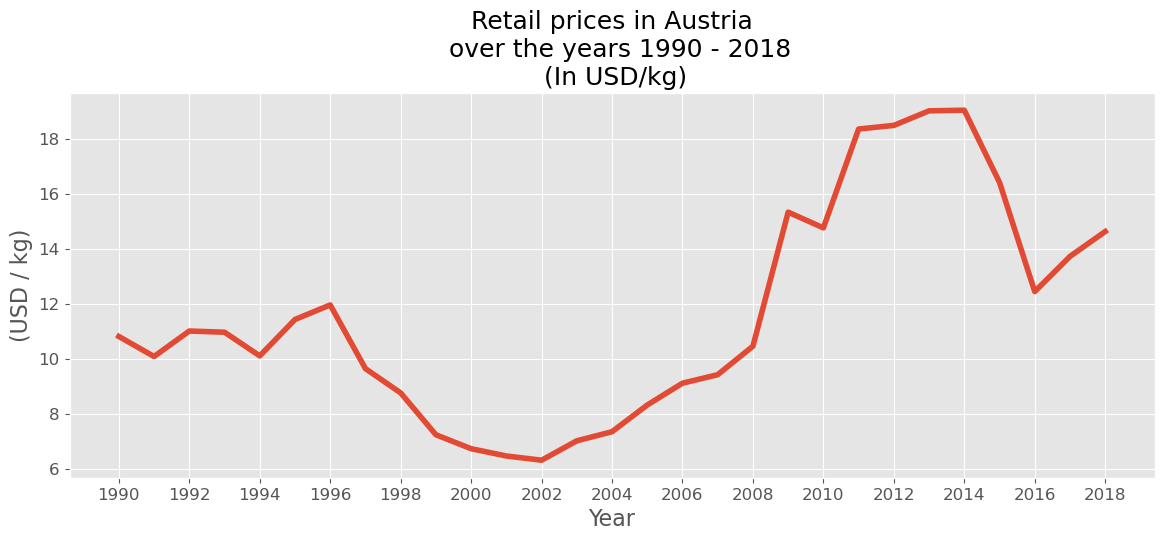

In [13]:
#   Creating graph
yearsCountry = list(dataframe['Year'])
valueCountry = list(dataframe['Value'])

plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.plot(yearsCountry, valueCountry, linewidth = 4)

plt.title('Retail prices in %s'
        '\n  over the years 1990 - 2018' 
        '\n (In USD/kg)'% country, fontsize = 18)

plt.xlabel('Year', fontsize = 16)
plt.ylabel('(USD / kg)', fontsize = 16)

plt.xticks([i for i in range(0, 29, 2)], fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

<p>&emsp;4. Summary of chosen year</p>

In [16]:
#   Creating Dataframe and summary
year = input("Insert year: ")
#country = "Norway" #    Static value
data = querryList(table, queryWhereYear, filter = year)

dataframe = pd.DataFrame(data, columns = header)
dataframe = dataframe.replace('-', np.nan)   #   Converting empty string to  
                                            #   Not a Number
dataframe = dataframe.dropna() # removing records with NaN values
dataframe = dataframe.drop(columns = 'Year')
print("Chosen year: %s"% year)
display(dataframe)
dataframe.describe()

maxCountry = dataframe.loc[dataframe['Value'] 
                        == max(dataframe['Value']), 'Country']
maxCountry = maxCountry.iloc[0]

minCountry = dataframe.loc[dataframe['Value'] 
                        == min(dataframe['Value']), 'Country']
minCountry = minCountry.iloc[0]

print("SUMMARY")
print("Country with highest value: %s"% maxCountry)
print("Country with lowest value: %s"% minCountry)

Insert year: 2018
Chosen year: 2018


,Country,Value
0,Austria,14.635762
1,Cyprus,12.781457
2,Denmark,11.699779
3,Finland,9.359823
4,France,8.123620
5,Germany,12.119205
6,Italy,17.924945
7,Netherlands,10.331126
8,Portugal,11.832230
9,Spain,9.050773


SUMMARY
Country with highest value: United Kingdom
Country with lowest value: Sweden


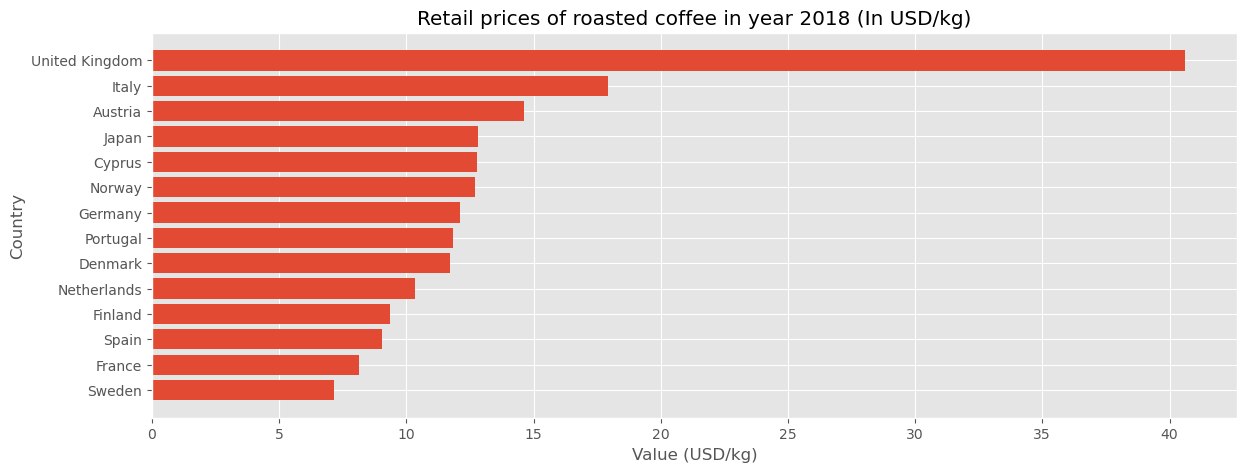

In [17]:
#   Creating graph
data = sorted(data, key=lambda x: x[2] #    Sorted by 'value' column
              , reverse = False #   Descending order 
              )
countriesYear = [col[0] for col in data]
valueYear = [col[2] for col in data]

plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.barh(countriesYear, valueYear)
plt.title("Retail prices of roasted coffee in year %s (In USD/kg)"% year)
plt.ylabel("Country")
plt.xlabel("Value (USD/kg)")

plt.show()

<h5>&emsp;<b>Imports</b></h5>

<p>&emsp;1. Total summary</p>

In [18]:
#   Creating dataframe and summary
table = 'imports'

    #   Getting column names from table
data = querryList(table, queryINF)
header = [col[1] for col in data]

    #   Getting table data
data = querryList(table, queryAll)

    #   Data Frame
dataframe = pd.DataFrame(data, columns=header)
dataframe = dataframe.replace('-', np.nan)   #   Converting empty string to  
                                            #   Not a Number
dataframe = dataframe.dropna() # removing records with NaN values
pd.set_option("display.max_rows", None)
display(dataframe)
    #   Summary 

maxRow = dataframe.loc[dataframe['Value'] == max(dataframe['Value']), 
                        ['Country', 'Year']]
maxRow = maxRow.iloc[0]

minRow = dataframe.loc[dataframe['Value'] == min(dataframe['Value']), 
                        ['Country', 'Year']]
minRow = minRow.iloc[0]

print("SUMMARY")
print("Country with highest value: '%s' in year: '%s'"% 
      (maxRow.iloc[0], maxRow.iloc[1]))
print("Country with lowest value: '%s' in year: '%s'"% 
      (minRow.iloc[0], minRow.iloc[1]))
dataframe.describe()

,Country,Year,Value
0,Austria,1990,1880.000000
1,Austria,1991,2058.000000
2,Austria,1992,2206.000000
3,Austria,1993,1836.000000
4,Austria,1994,1417.000000
5,Austria,1995,1231.000000
6,Austria,1996,1210.000000
7,Austria,1997,1294.000000
8,Austria,1998,1293.000000
9,Austria,1999,1500.000000


SUMMARY
Country with highest value: 'USA' in year: '2017'
Country with lowest value: 'Chad' in year: '2001'


,Value
count,1431.000000
mean,1830.308948
std,4120.501935
min,0.000000
25%,16.000000
50%,322.000000
75%,1557.000000
max,29487.886460


<p>&emsp;2. Summary of average values over the years</p>

In [19]:
#   Creating Dataframe and summary
cols = ['Year', 'Value']
data = querryList(table, queryAVG, cols)

dataframe = pd.DataFrame(data, columns = ['Year', 'Average Value'])
display(dataframe)
dataframe.describe()

maxAVG = dataframe.loc[dataframe['Average Value'] == 
                       max(dataframe['Average Value']), 'Year']
maxAVG = maxAVG.iloc[0]

minAVG = dataframe.loc[dataframe['Average Value'] == 
                       min(dataframe['Average Value']), 'Year']
minAVG = minAVG.iloc[0]

print("SUMMARY")
print("Year with highest average value: %s"% maxAVG)
print("Year with lowest average value: %s"% minAVG)
dataframe.describe()


,Year,Average Value
0,1990,1390.980816
1,1991,1367.242649
2,1992,1480.317965
3,1993,1462.101786
4,1994,1429.119507
5,1995,1353.295536
6,1996,1464.669629
7,1997,1535.939461
8,1998,1531.136977
9,1999,1642.821035


SUMMARY
Year with highest average value: 2013
Year with lowest average value: 2014


,Average Value
count,29.000000
mean,1620.422359
std,386.570064
min,742.797297
25%,1429.119507
50%,1642.821035
75%,1927.660714
max,2252.750000


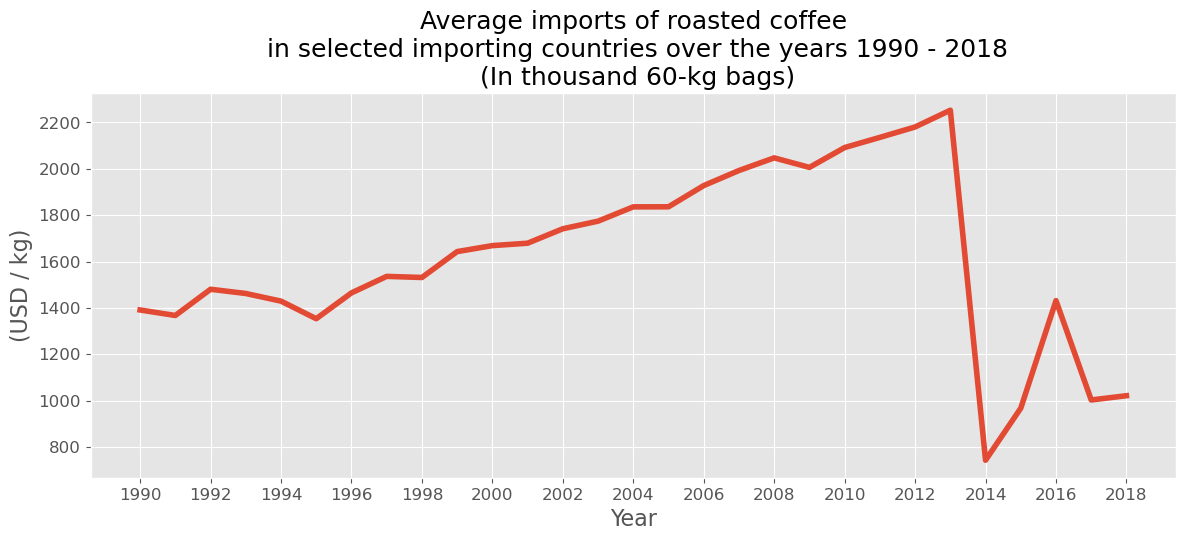

In [20]:
#   Creating graph
yearsPrice = list(dataframe["Year"])
avgPrice = list(dataframe["Average Value"])

plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.plot(yearsPrice, avgPrice, linewidth = 4)

plt.title('Average imports of roasted coffee'
            '\n in selected importing countries over the years 1990 - 2018' 
            '\n (In thousand 60-kg bags)', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('(USD / kg)', fontsize = 16)

plt.xticks([i for i in range(0, 29, 2)], fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

<p>&emsp;3. Summary of chosen country</p>

In [22]:
#   Creating Dataframe and summary
country = input("Insert country name: ")
#country = "Norway" #    Static value
data = querryList(table, queryWhereCountry, filter = country)

dataframe = pd.DataFrame(data, columns = header)
dataframe = dataframe.replace(['-',0], np.nan)   #   Converting empty string to  
                                            #   Not a Number
dataframe = dataframe.dropna() # removing records with NaN values
dataframe = dataframe.drop(columns = 'Country')
print("Chosen country: %s"% country.upper())
display(dataframe)

maxYear = dataframe.loc[dataframe['Value'] == max(dataframe['Value']), 'Year']
maxYear = maxYear.iloc[0]

minYear = dataframe.loc[dataframe['Value'] == min(dataframe['Value']), 'Year']
minYear = minYear.iloc[0]

print("SUMMARY")
print("Year with highest value: %s"% maxYear)
print("Year with lowest value: %s"% minYear)
dataframe.describe()

Insert country name: Cyprus
Chosen country: CYPRUS


,Year,Value
0,1990,50.0
1,1991,54.0
2,1992,41.0
3,1993,77.0
4,1994,52.0
5,1995,44.0
6,1996,52.0
7,1997,41.0
8,1998,50.0
9,1999,55.0


SUMMARY
Year with highest value: 2013
Year with lowest value: 1992


,Value
count,24.000000
mean,63.791667
std,14.882085
min,41.000000
25%,52.000000
50%,59.000000
75%,77.000000
max,94.000000


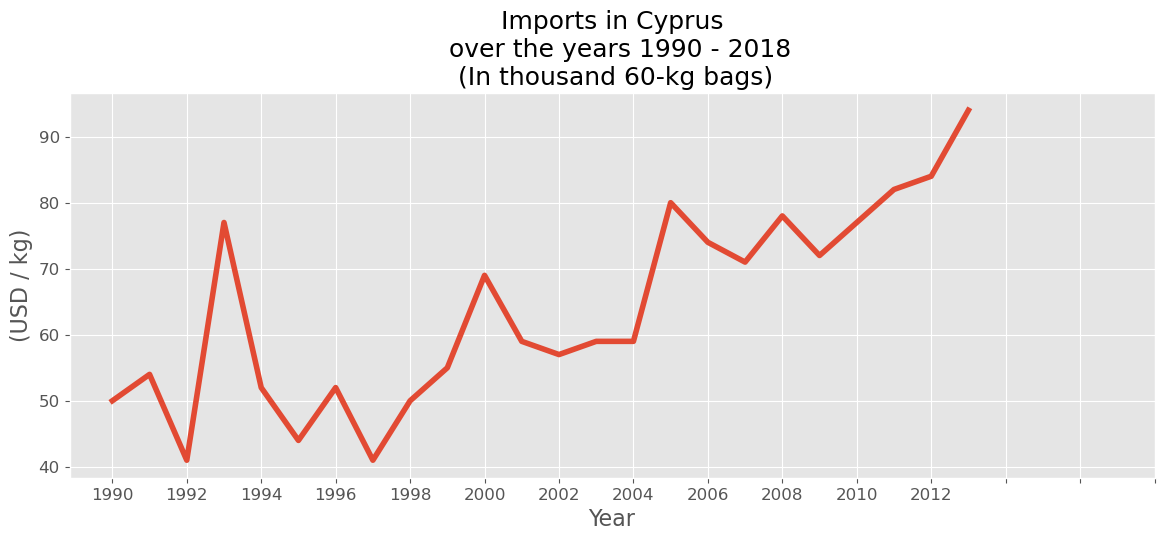

In [23]:
#   Creating graph
yearsCountry = list(dataframe["Year"])
valueCountry = list(dataframe["Value"])

plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.plot(yearsCountry, valueCountry, linewidth = 4)

plt.title('Imports in %s'
        '\n  over the years 1990 - 2018' 
        '\n (In thousand 60-kg bags)'% country, fontsize = 18)

plt.xlabel('Year', fontsize = 16)
plt.ylabel('(USD / kg)', fontsize = 16)

plt.xticks([i for i in range(0, 29, 2)], fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

<p>&emsp;4. Summary of chosen year</p>

In [24]:
#   Creating Dataframe and summary
year = input("Insert year: ")
#year = "2018" #    Static value
data = querryList(table, queryWhereYear, filter = year)

dataframe = pd.DataFrame(data, columns = header)
dataframe = dataframe.replace(['-', 0], np.nan)   #   Converting empty string to  
                                            #   Not a Number
dataframe = dataframe.dropna() # removing records with NaN values
dataframe = dataframe.drop(columns = 'Year')
print("Chosen year: %s"% year)
display(dataframe)
dataframe.describe()

maxCountry = dataframe.loc[dataframe['Value'] 
                        == max(dataframe['Value']), 'Country']
maxCountry = maxCountry.iloc[0]

minCountry = dataframe.loc[dataframe['Value'] 
                        == min(dataframe['Value']), 'Country']
minCountry = minCountry.iloc[0]

print("SUMMARY")
print("Country with highest value: %s"% maxCountry)
print("Country with lowest value: %s"% minCountry)
dataframe.describe()


Insert year: 2002
Chosen year: 2002


,Country,Value
0,Austria,1447.0
1,Belgium,3792.0
3,Bulgaria,343.0
4,Croatia,371.0
5,Cyprus,57.0
6,Czech Republic,888.0
7,Denmark,1076.0
8,Estonia,120.0
9,Finland,1075.0
10,France,6925.0


SUMMARY
Country with highest value: USA
Country with lowest value: Gambia


,Value
count,52.000000
mean,1875.326923
std,3872.243003
min,1.000000
25%,27.250000
50%,357.000000
75%,1560.250000
max,21639.000000


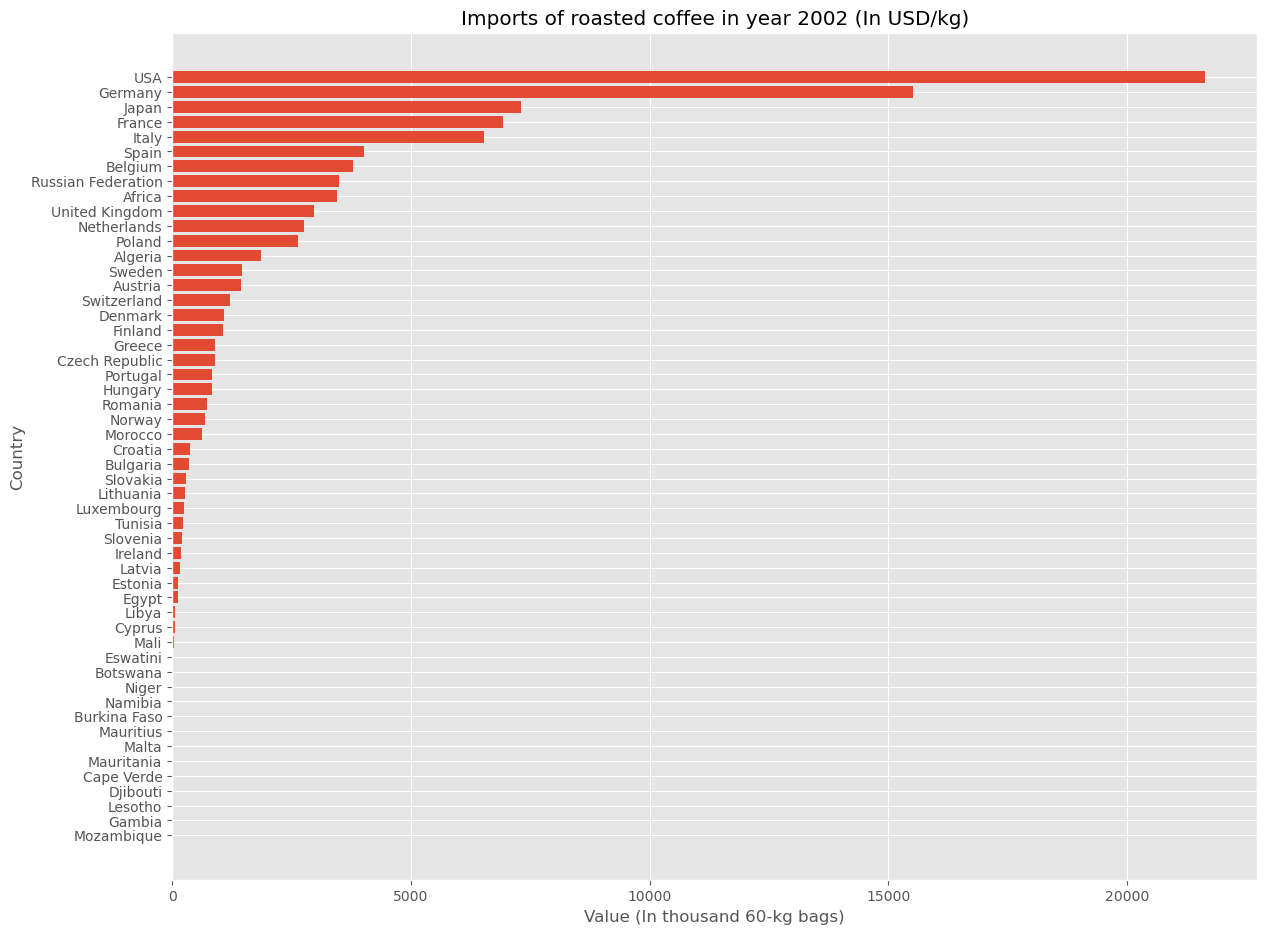

In [25]:
#   Creating graph
dataframe = dataframe.sort_values(by = 'Value', axis = 0)
countriesYear = list(dataframe['Country'])
valueYear = list(dataframe['Value'])

plt.style.use('ggplot')
plt.figure(figsize=(14,11))
plt.barh(countriesYear, valueYear)
plt.title("Imports of roasted coffee in year %s (In USD/kg)"% year)
plt.ylabel("Country")
plt.xlabel("Value (In thousand 60-kg bags)")

plt.show()

<h5>&emsp;<b>Total production</b></h5>

<p>&emsp;1. Total summary</p>

In [27]:
#   Creating dataframe and summary
table = 'production'

    #   Getting column names from table
data = querryList(table, queryINF)
header = [col[1] for col in data]

    #   Getting table data
data = querryList(table, queryAll)

    #   Data Frame
dataframe = pd.DataFrame(data, columns=header)
dataframe = dataframe.replace('-', np.nan)   #   Converting empty string to  
                                            #   Not a Number
dataframe = dataframe.dropna() # removing records with NaN values
pd.set_option("display.max_rows", None)
display(dataframe)
    #   Summary 

maxRow = dataframe.loc[dataframe['Value'] == max(dataframe['Value']), 
                        ['Country', 'Year']]
maxRow = maxRow.iloc[0]

minRow = dataframe.loc[dataframe['Value'] == min(dataframe['Value']), 
                        ['Country', 'Year']]
minRow = minRow.iloc[0]

print("SUMMARY")
print("Country with highest value: '%s' in year: '%s'"% 
      (maxRow.iloc[0], maxRow.iloc[1]))
print("Country with lowest value: '%s' in year: '%s'"% 
      (minRow.iloc[0], minRow.iloc[1]))
dataframe.describe()

,Country,Year,Value
0,Angola,1990,50.3450
1,Angola,1991,79.3310
2,Angola,1992,77.5200
3,Angola,1993,32.6080
4,Angola,1994,76.8020
5,Angola,1995,62.1090
6,Angola,1996,70.9250
7,Angola,1997,64.3300
8,Angola,1998,85.3440
9,Angola,1999,54.9390


SUMMARY
Country with highest value: 'Brazil' in year: '2018'
Country with lowest value: 'Timor-Leste' in year: '1990'


,Value
count,1624.000000
mean,2209.623978
std,6331.010350
min,0.000000
25%,35.974875
50%,337.865500
75%,1500.411250
max,62924.883600


<p>&emsp;2. Summary of average values over the years</p>

In [28]:
#   Creating Dataframe and summary
cols = ['Year', 'Value']
data = querryList(table, queryAVG, cols)

dataframe = pd.DataFrame(data, columns = ['Year', 'Average Value'])
display(dataframe)
dataframe.describe()

maxAVG = dataframe.loc[dataframe['Average Value'] == 
                       max(dataframe['Average Value']), 'Year']
maxAVG = maxAVG.iloc[0]

minAVG = dataframe.loc[dataframe['Average Value'] == 
                       min(dataframe['Average Value']), 'Year']
minAVG = minAVG.iloc[0]

print("SUMMARY")
print("Year with highest average value: %s"% maxAVG)
print("Year with lowest average value: %s"% minAVG)
dataframe.describe()

,Year,Average Value
0,1990,1664.822493
1,1991,1808.333650
2,1992,1759.391057
3,1993,1638.653957
4,1994,1666.307036
5,1995,1559.240325
6,1996,1844.689214
7,1997,1783.235696
8,1998,1944.503805
9,1999,2346.139227


SUMMARY
Year with highest average value: 2018
Year with lowest average value: 1995


,Average Value
count,29.000000
mean,2209.623978
std,433.034780
min,1559.240325
25%,1844.689214
50%,2175.758211
75%,2544.203352
max,3052.441745


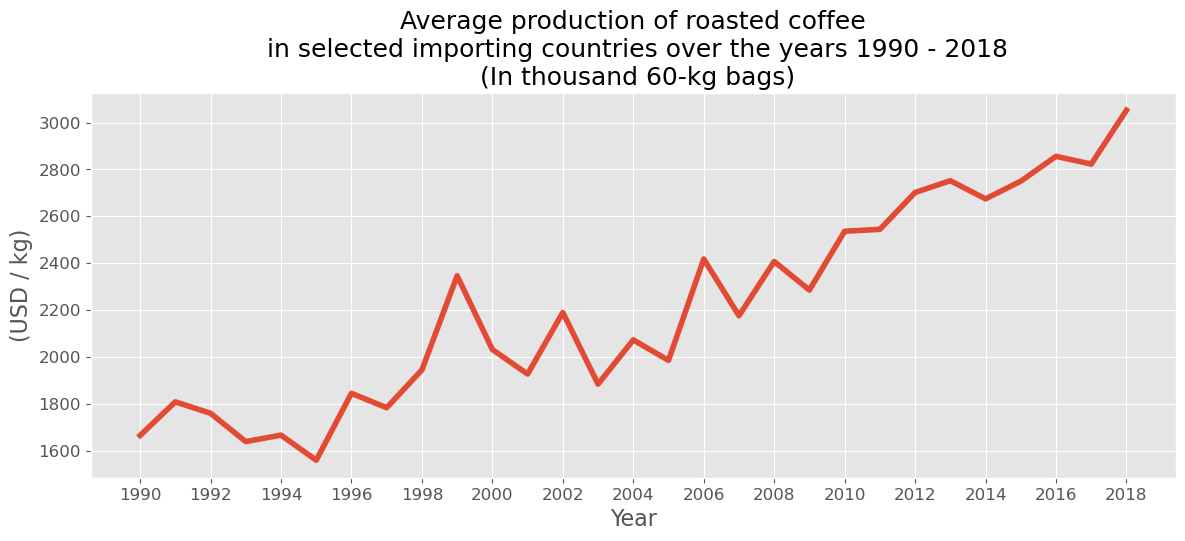

In [29]:
#   Creating graph
yearsPrice = list(dataframe["Year"])
avgPrice = list(dataframe["Average Value"])

plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.plot(yearsPrice, avgPrice, linewidth = 4)

plt.title('Average production of roasted coffee'
            '\n in selected importing countries over the years 1990 - 2018' 
            '\n (In thousand 60-kg bags)', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('(USD / kg)', fontsize = 16)

plt.xticks([i for i in range(0, 29, 2)], fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

<p>&emsp;3. Summary of chosen country</p>

In [30]:
#   Creating Dataframe and summary
country = input("Insert country name: ")
#country = "Norway" #    Static value
data = querryList(table, queryWhereCountry, filter = country)

dataframe = pd.DataFrame(data, columns = header)
dataframe = dataframe.replace(['-',0], np.nan)   #   Converting empty string to  
                                            #   Not a Number
dataframe = dataframe.dropna() # removing records with NaN values
dataframe = dataframe.drop(columns = 'Country')
print("Chosen country: %s"% country.upper())
display(dataframe)

maxYear = dataframe.loc[dataframe['Value'] == max(dataframe['Value']), 'Year']
maxYear = maxYear.iloc[0]

minYear = dataframe.loc[dataframe['Value'] == min(dataframe['Value']), 'Year']
minYear = minYear.iloc[0]

print("SUMMARY")
print("Year with highest value: %s"% maxYear)
print("Year with lowest value: %s"% minYear)
dataframe.describe()

Insert country name: Angola
Chosen country: ANGOLA


,Year,Value
0,1990,50.3450
1,1991,79.3310
2,1992,77.5200
3,1993,32.6080
4,1994,76.8020
5,1995,62.1090
6,1996,70.9250
7,1997,64.3300
8,1998,85.3440
9,1999,54.9390


SUMMARY
Year with highest value: 1998
Year with lowest value: 2009


,Value
count,29.000000
mean,45.256048
std,19.486885
min,13.420000
25%,34.935000
50%,39.405000
75%,56.640000
max,85.344000


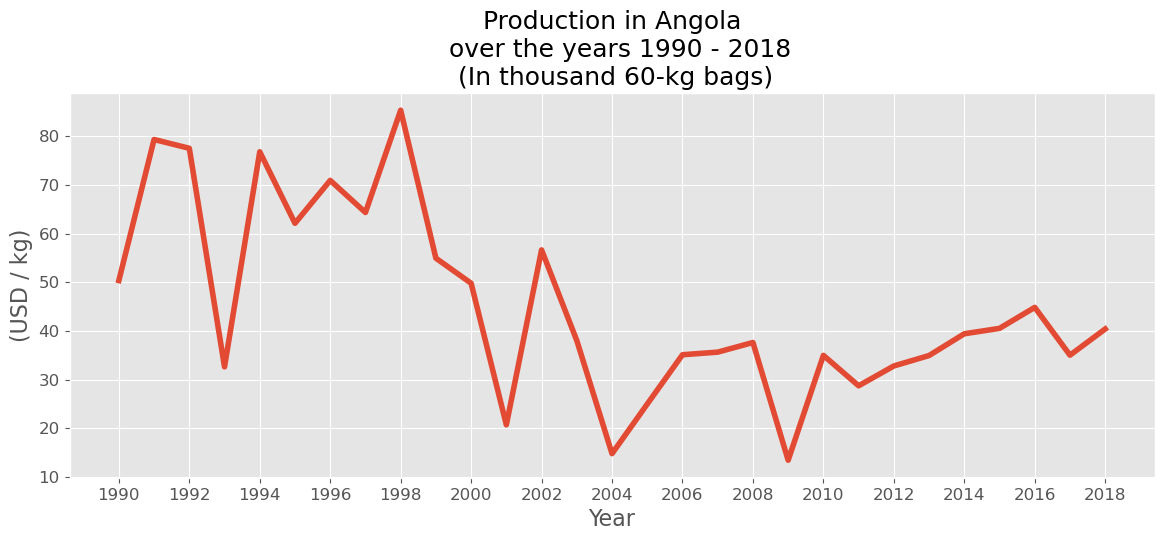

In [31]:
#   Creating graph
yearsCountry = list(dataframe["Year"])
valueCountry = list(dataframe["Value"])

plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.plot(yearsCountry, valueCountry, linewidth = 4)

plt.title('Production in %s'
        '\n  over the years 1990 - 2018' 
        '\n (In thousand 60-kg bags)'% country, fontsize = 18)

plt.xlabel('Year', fontsize = 16)
plt.ylabel('(USD / kg)', fontsize = 16)

plt.xticks([i for i in range(0, 29, 2)], fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

<p>&emsp;4. Summary of chosen year</p>

In [32]:
#   Creating Dataframe and summary
year = input("Insert year: ")
#year = "2018" #    Static value
data = querryList(table, queryWhereYear, filter = year)

dataframe = pd.DataFrame(data, columns = header)
dataframe = dataframe.replace(['-', 0], np.nan)   #   Converting empty string to  
                                            #   Not a Number
dataframe = dataframe.dropna() # removing records with NaN values
dataframe = dataframe.drop(columns = 'Year')
print("Chosen year: %s"% year)
display(dataframe)
dataframe.describe()

maxCountry = dataframe.loc[dataframe['Value'] 
                        == max(dataframe['Value']), 'Country']
maxCountry = maxCountry.iloc[0]

minCountry = dataframe.loc[dataframe['Value'] 
                        == min(dataframe['Value']), 'Country']
minCountry = minCountry.iloc[0]

print("SUMMARY")
print("Country with highest value: %s"% maxCountry)
print("Country with lowest value: %s"% minCountry)
dataframe.describe()


Insert year: 2004
Chosen year: 2004


,Country,Value
0,Angola,14.7700
1,Bolivia (Plurinational State of),154.8071
2,Brazil,39281.1457
3,Burundi,437.0360
4,Ecuador,780.4350
5,Indonesia,7536.3710
6,Madagascar,521.6600
7,Malawi,20.6150
8,Papua New Guinea,997.5140
9,Paraguay,26.2389


SUMMARY
Country with highest value: Brazil
Country with lowest value: Gabon


,Value
count,54.000000
mean,2149.365667
std,5840.221397
min,0.300000
25%,29.447175
50%,372.326350
75%,1294.118450
max,39281.145700


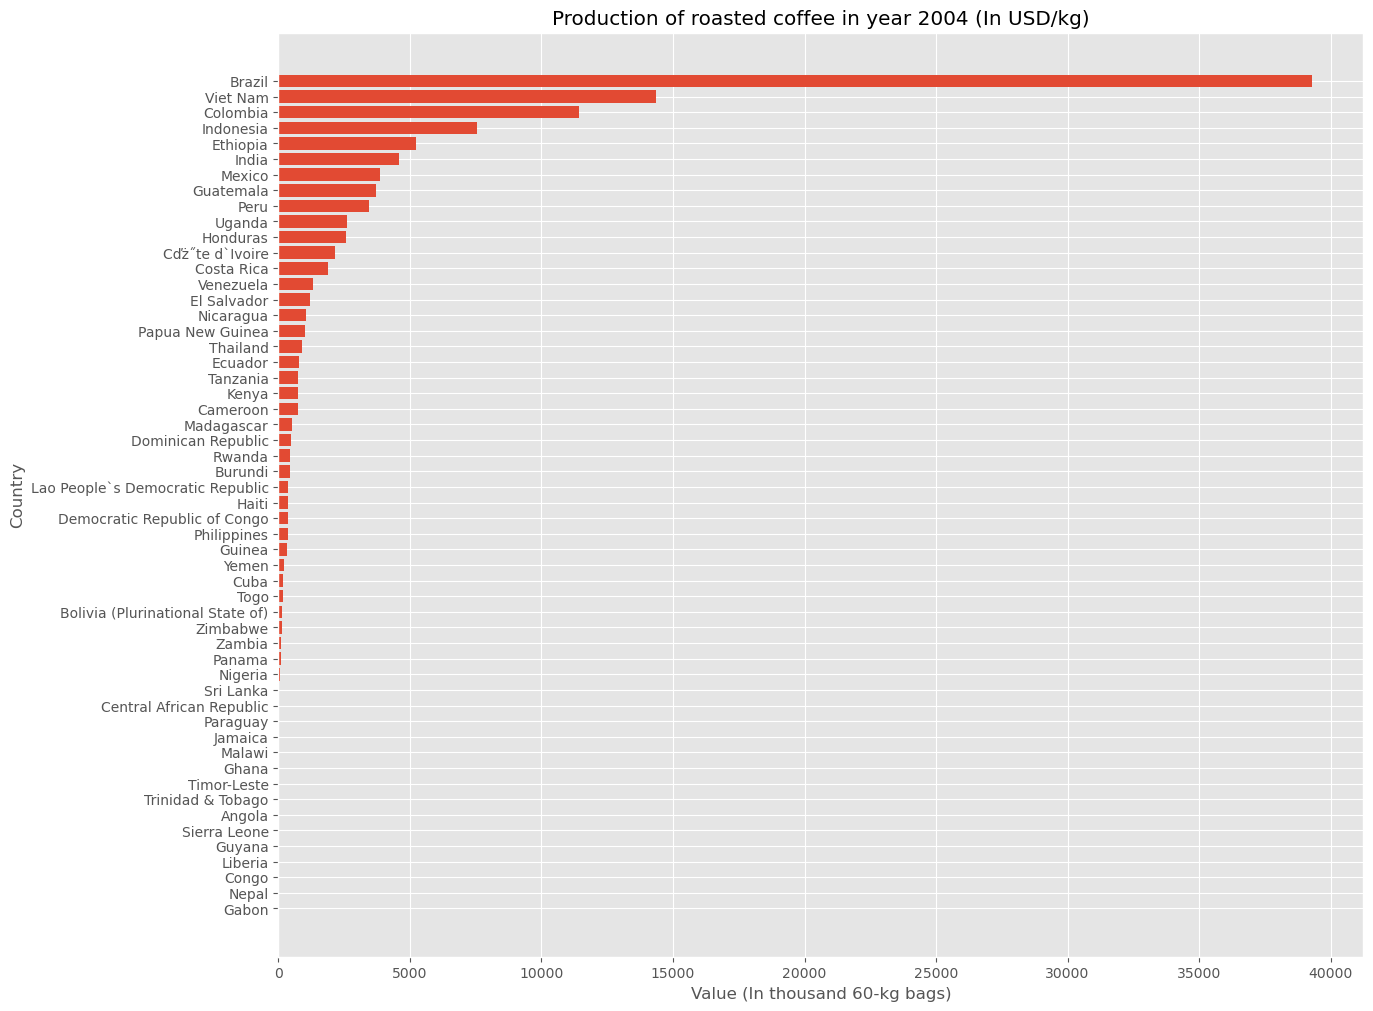

In [33]:
#   Creating graph
dataframe = dataframe.sort_values(by = 'Value', axis = 0)
countriesYear = list(dataframe['Country'])
valueYear = list(dataframe['Value'])

plt.style.use('ggplot')
plt.figure(figsize=(14,12))
plt.barh(countriesYear, valueYear)
plt.title("Production of roasted coffee in year %s (In USD/kg)"% year)
plt.ylabel("Country")
plt.xlabel("Value (In thousand 60-kg bags)")

plt.show()